In [1]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random




Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteLV09J6/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteLV09J6/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


**

The Fashion-MNIST dataset is a collection of images from Zalando's fashion articles. It includes a training set of 60,000 examples and a test set of 10,000 examples. Each image is grayscale and has a size of 28x28 pixels. The dataset is labeled with 10 different classes, allowing for classification tasks. It maintains the same image size, training, and testing splits

Each image in the Fashion MNIST dataset has a dimension of 28 pixels in height and 28 pixels in width, resulting in a total of 784 pixels. Each pixel is represented by a single pixel-value, which indicates the lightness or darkness of that specific pixel. Higher pixel-values correspond to darker shades. These pixel-values are integers ranging from 0 to 255, representing the grayscale intensity.

Both the training and test datasets consist of 785 columns. The first column of each dataset contains the class labels, which indicate the type of clothing item represented by the corresponding image. The remaining 784 columns (1-785) contain the pixel-values of the associated image, providing the grayscale intensity information for each pixel in a flattened format.

To read the Fashion MNIST data, it is important to note that there are 10 distinct classes of images, each representing a specific type of clothing item. The classes are labeled as follows:

0: T-shirt/top 1: Trouser 2: Pullover 3: Dress 4: Coat 5: Sandal 6: Shirt 7: Sneaker 8: Bag 9: Ankle boot

The images in the dataset have dimensions of 28x28 pixels, meaning they are 28 pixels in height and 28 pixels in width.

The dataset is divided into two separate datasets: the training set and the test set. These datasets contain the labeled images for training and evaluation purposes, respectively.

**

In [2]:
# Load the Fashion-MNIST dataset
train_dataset, test_dataset = tfds.load('fashion_mnist', split=['train', 'test'], shuffle_files=True)

train_data = tfds.as_dataframe(train_dataset)
test_data = tfds.as_dataframe(test_dataset)

#import tensorflow as tf
#(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()  # this was an alternative way to read the datasset


In [13]:
print("Fashion MNIST train has rows:",train_data.shape[0]," and columns:", train_data.shape[1])
print("Fashion MNIST test has rows:",test_data.shape[0]," and columns:", test_data.shape[1])
test_data.head(5)

Fashion MNIST train has rows: 60000  and columns: 2
Fashion MNIST test has rows: 10000  and columns: 2


,image,label
0,"[[[0], [0], [0], [0], [0], [0], [0], [0], [3],...",4
1,"[[[0], [0], [0], [0], [0], [0], [0], [0], [1],...",4
2,"[[[0], [0], [0], [0], [0], [0], [0], [0], [0],...",9
3,"[[[0], [0], [0], [0], [0], [0], [0], [0], [0],...",7
4,"[[[0], [0], [0], [0], [0], [0], [0], [0], [0],...",5


In [14]:
#test_data['image'][0].shape  #(28,28,1)
train_data.info()

<class 'tensorflow_datasets.core.as_dataframe.StyledDataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   60000 non-null  object
 1   label   60000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 937.6+ KB


In [16]:
print(train_data['image'].head())


0    [[[0], [0], [0], [0], [0], [0], [0], [0], [0],...
1    [[[0], [0], [0], [0], [0], [0], [0], [0], [0],...
2    [[[0], [0], [0], [0], [0], [0], [0], [0], [0],...
3    [[[0], [0], [0], [0], [0], [0], [0], [0], [0],...
4    [[[0], [0], [0], [0], [0], [0], [0], [0], [0],...
Name: image, dtype: object


In [5]:
# Create a dictionary for each type of label
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def get_classes_distribution(data):
    # Get the count for each label
    label_counts = data["label"].value_counts()
    # Get total number of samples
    total_samples = len(data)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

get_classes_distribution(train_data)

Pullover            :   6000 or 10.0%
Trouser             :   6000 or 10.0%
Bag                 :   6000 or 10.0%
Coat                :   6000 or 10.0%
Ankle Boot          :   6000 or 10.0%
T-shirt/top         :   6000 or 10.0%
Shirt               :   6000 or 10.0%
Sneaker             :   6000 or 10.0%
Sandal              :   6000 or 10.0%
Dress               :   6000 or 10.0%


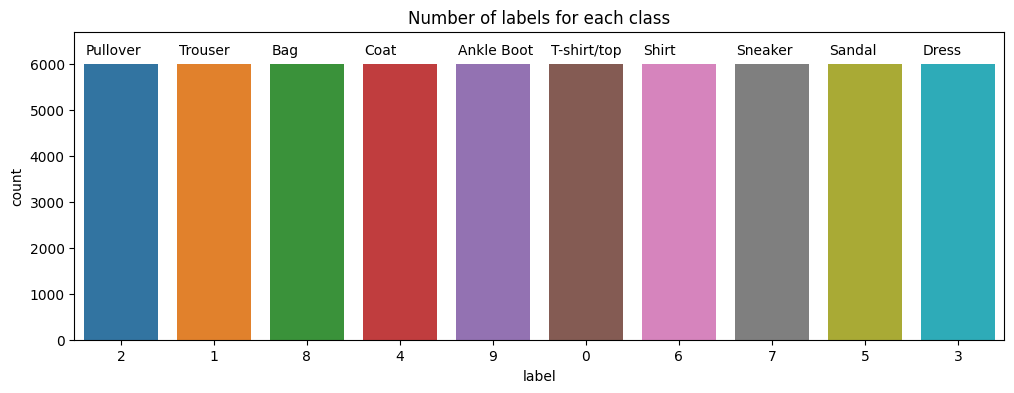

In [6]:
def plot_label_per_class(data):
    data = pd.DataFrame(data)  # Convert data to a Pandas DataFrame
    f, ax = plt.subplots(1, 1, figsize=(12, 4))
    g = sns.countplot(data=data, x="label", order=data["label"].value_counts().index)
    g.set_title("Number of labels for each class")

    for p, label in zip(g.patches, data["label"].value_counts().index):
        g.annotate(labels[label], (p.get_x()+0.02, p.get_height() + 200))

    # Save the plot as a PNG image
    plt.savefig('train_data_label_per_class.png')
    plt.ylim(0,6700)
    plt.show()

plot_label_per_class(train_data)


In [7]:
get_classes_distribution(test_data)

Coat                :   1000 or 10.0%
Ankle Boot          :   1000 or 10.0%
Sneaker             :   1000 or 10.0%
Sandal              :   1000 or 10.0%
Trouser             :   1000 or 10.0%
T-shirt/top         :   1000 or 10.0%
Bag                 :   1000 or 10.0%
Pullover            :   1000 or 10.0%
Dress               :   1000 or 10.0%
Shirt               :   1000 or 10.0%


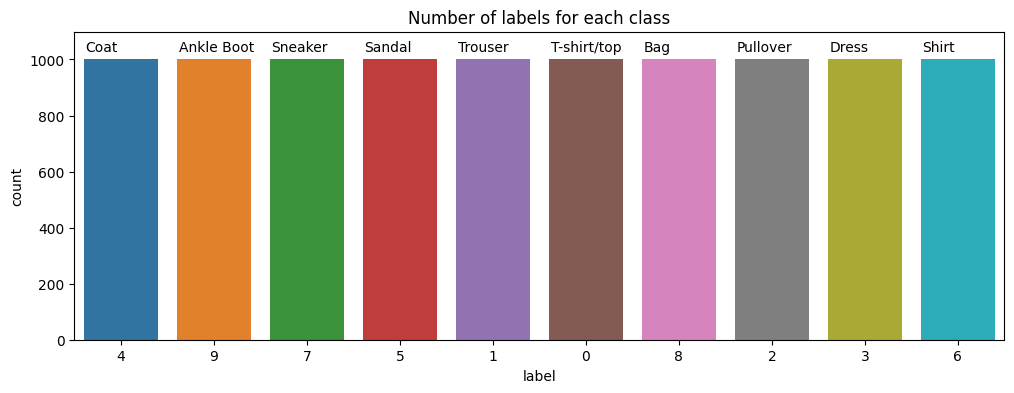

In [8]:
def plot_label_per_class(data):
    data = pd.DataFrame(data)  # Convert data to a Pandas DataFrame
    f, ax = plt.subplots(1, 1, figsize=(12, 4))
    g = sns.countplot(data=data, x="label", order=data["label"].value_counts().index)
    g.set_title("Number of labels for each class")

    for p, label in zip(g.patches, data["label"].value_counts().index):
        g.annotate(labels[label], (p.get_x()+0.02, p.get_height() + 30))

    # Save the plot as a PNG image
    plt.savefig('test_data_label_per_class.png')
    plt.ylim(0,1099)
    plt.show()

plot_label_per_class(test_data)


In [118]:
#import tensorflow as tf
#(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()  # this was an alternative way to read the datasset
#train_dataset, test_dataset = tfds.load('fashion_mnist', split=['train', 'test'], shuffle_files=True)  # than this one


In [9]:
def sample_images_data(data):
    # An empty list to collect some samples
    sample_images = []
    sample_labels = []

    # Iterate over the keys of the labels dictionary defined in the above cell
    for k in labels.keys():
        # Get four samples for each category
        samples = random.sample(list(train_data[train_data['label'] == k]['image']), 4)
        # Append the samples to the samples list
        for j, s in enumerate(samples):
            # First column contain labels, hence index should start from 1
            img = np.array(samples[j])
            sample_images.append(img)
            sample_labels.append(k)

    print("Total number of sample images to plot: ", len(sample_images))
    return sample_images, sample_labels

train_sample_images, train_sample_labels = sample_images_data(train_data)


Total number of sample images to plot:  40


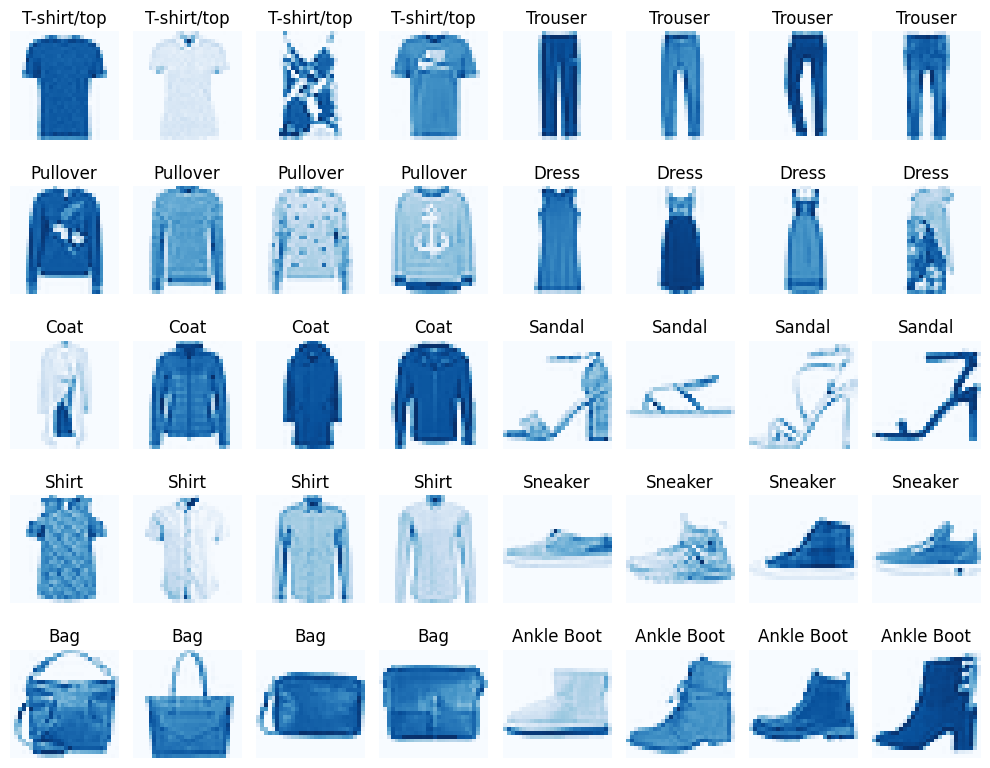

In [10]:
def plot_sample_images(data_sample_images,data_sample_labels,cmap="Blues"):
    # Plot the sample images now
    fig, axes = plt.subplots(5, 8, figsize=(10,8))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data_sample_images[i], cmap='Blues')
        ax.axis('off')
        ax.set_title(labels[data_sample_labels[i]])
    plt.tight_layout()
    plt.show()


plot_sample_images(train_sample_images,train_sample_labels)


Total number of sample images to plot:  40


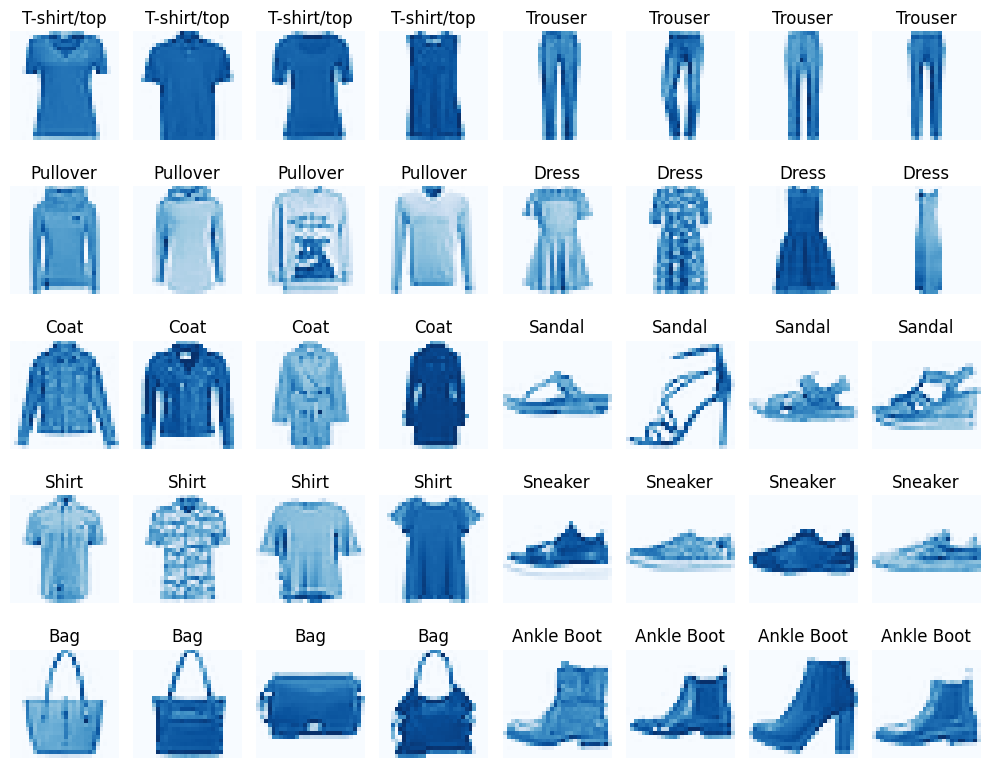

In [11]:
test_sample_images, test_sample_labels = sample_images_data(test_data)
plot_sample_images(test_sample_images,test_sample_labels, "Greens")




***Here We Find out we have a balanced Data for all 10 classes and we got a feeling of hove the Data loooks like and no missing values or anything of that sort***

We Can also normalize the pixel values to be between 0 and 1 , but not sure if it helps in anyway

We can also split the train data into valididation and train set, also we can play with some random images from each class rotate them mirror them or augment them and add them to the training and testing set , i will come back to these ideas later,   